# RNN,  LSTM vizual plot

In [1]:
# !pip install Keras
# !pip install tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.fftpack import fft
from scipy import signal
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import io
import pandas as pd
import numpy as np
import matplotlib  as mpl
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler 

In [2]:
%matplotlib inline
dfx=pd.read_csv('data_zero.csv')
calculation_speed = 100
dfx[::calculation_speed]

,miliseka,P_147_P0,P_147_P1,P_147_P1_L,P_147_P1_W,P_157_P0,P_157_P0_L,P_157_P1,P_158_P0_FM,P_180_P0,...,P_217_P0,P_237_P0_FM,P_253_P0,P_272_P0,P_281_P0,P_292_P0,P_312_P0,P_335_P0,P_354_P0,P_375_P0
0,1.313696e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100,1.313696e+12,-0.000477,0.001907,0.011444,-0.049595,0.019455,-0.013351,0.021744,-0.001907,-0.002289,...,-0.008013,-0.003815,0.000000,0.006866,-0.005722,0.004578,-0.014877,-0.018312,-0.034333,0.005341
200,1.313696e+12,-0.003815,-0.009541,0.011444,-0.007629,0.019455,-0.011444,0.017166,0.015259,0.028610,...,-0.017168,-0.007629,-0.001144,0.010300,-0.004578,0.003433,-0.012589,-0.001526,-0.024415,0.000000
300,1.313696e+12,-0.007630,-0.009541,0.011444,-0.028614,0.035477,0.005722,0.033190,0.015259,0.016022,...,-0.012590,-0.009537,-0.001144,0.014877,-0.013733,0.008011,-0.003433,-0.002289,-0.028993,-0.054933
400,1.313696e+12,-0.006676,-0.007633,0.005722,-0.011444,0.036621,0.003815,0.028612,0.028610,0.010300,...,-0.040056,-0.022890,0.001144,0.011444,-0.020599,0.006866,-0.014877,-0.005341,-0.009155,0.025940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89500,1.313697e+12,0.011444,-0.131611,-0.085835,-0.093464,-0.088121,-0.106813,-0.088120,-0.110628,-0.096132,...,-0.153355,-0.162128,-0.164797,-0.173954,-0.199129,-0.197987,-0.219728,-0.270085,-0.284581,-0.354772
89600,1.313697e+12,0.005722,-0.112537,-0.085835,-0.122074,-0.080111,-0.118258,-0.082397,-0.093462,-0.101854,...,-0.141911,-0.160221,-0.156786,-0.163654,-0.207140,-0.194553,-0.228884,-0.267797,-0.304418,-0.331121
89700,1.313697e+12,0.008583,-0.085835,-0.085835,-0.099186,-0.096132,-0.106813,-0.093842,-0.082018,-0.080111,...,-0.149921,-0.150684,-0.168230,-0.162510,-0.202562,-0.194553,-0.223162,-0.286870,-0.294499,-0.333410
89800,1.313697e+12,0.007629,-0.099186,-0.078205,-0.095371,-0.077822,-0.099184,-0.074387,-0.112535,-0.107576,...,-0.155643,-0.164036,-0.157930,-0.169376,-0.226595,-0.186543,-0.212862,-0.267034,-0.311284,-0.329595


In [3]:
# **Why is do we have 3 values as inputs?**

# We will see latter that RNNs, LTSMs require 3D input for the X values. This is often very confusing for beginners and people who return back to the field after a break (make sure you remember this, because even if you are an employeed data scientist you might not work with RNNs and forget this information, which is fundamental to understanding of RNNs). What are those 3 dimensions:

# - **Samples / how many sequences**. One sequence is one sample. A batch is comprised of one or more samples (batch size not specified).
# - **Time Steps / how many values in each sample**. One time step is one point of observation in the sample.
# - **Features / collumn count**. One feature is one observation at a time step. This is essentially how many values at each time step you have.

# Say we want to feed this into our network:

In [4]:
def taking_of_nan_values_DF(df):
    print("taking_of_nan_values_DF(df)")
    # interpolation
    df = df.interpolate(method='linear', limit_direction='forward', axis=0)
    # taking of nullmi
    df = df.fillna(method='ffill')
    df = df.fillna(method='bfill')
    return df

In [5]:
df = pd.DataFrame(dfx[::calculation_speed])
df = taking_of_nan_values_DF(pd.DataFrame(df))
df

taking_of_nan_values_DF(df)


,miliseka,P_147_P0,P_147_P1,P_147_P1_L,P_147_P1_W,P_157_P0,P_157_P0_L,P_157_P1,P_158_P0_FM,P_180_P0,...,P_217_P0,P_237_P0_FM,P_253_P0,P_272_P0,P_281_P0,P_292_P0,P_312_P0,P_335_P0,P_354_P0,P_375_P0
0,1.313696e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100,1.313696e+12,-0.000477,0.001907,0.011444,-0.049595,0.019455,-0.013351,0.021744,-0.001907,-0.002289,...,-0.008013,-0.003815,0.000000,0.006866,-0.005722,0.004578,-0.014877,-0.018312,-0.034333,0.005341
200,1.313696e+12,-0.003815,-0.009541,0.011444,-0.007629,0.019455,-0.011444,0.017166,0.015259,0.028610,...,-0.017168,-0.007629,-0.001144,0.010300,-0.004578,0.003433,-0.012589,-0.001526,-0.024415,0.000000
300,1.313696e+12,-0.007630,-0.009541,0.011444,-0.028614,0.035477,0.005722,0.033190,0.015259,0.016022,...,-0.012590,-0.009537,-0.001144,0.014877,-0.013733,0.008011,-0.003433,-0.002289,-0.028993,-0.054933
400,1.313696e+12,-0.006676,-0.007633,0.005722,-0.011444,0.036621,0.003815,0.028612,0.028610,0.010300,...,-0.040056,-0.022890,0.001144,0.011444,-0.020599,0.006866,-0.014877,-0.005341,-0.009155,0.025940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89500,1.313697e+12,0.011444,-0.131611,-0.085835,-0.093464,-0.088121,-0.106813,-0.088120,-0.110628,-0.096132,...,-0.153355,-0.162128,-0.164797,-0.173954,-0.199129,-0.197987,-0.219728,-0.270085,-0.284581,-0.354772
89600,1.313697e+12,0.005722,-0.112537,-0.085835,-0.122074,-0.080111,-0.118258,-0.082397,-0.093462,-0.101854,...,-0.141911,-0.160221,-0.156786,-0.163654,-0.207140,-0.194553,-0.228884,-0.267797,-0.304418,-0.331121
89700,1.313697e+12,0.008583,-0.085835,-0.085835,-0.099186,-0.096132,-0.106813,-0.093842,-0.082018,-0.080111,...,-0.149921,-0.150684,-0.168230,-0.162510,-0.202562,-0.194553,-0.223162,-0.286870,-0.294499,-0.333410
89800,1.313697e+12,0.007629,-0.099186,-0.078205,-0.095371,-0.077822,-0.099184,-0.074387,-0.112535,-0.107576,...,-0.155643,-0.164036,-0.157930,-0.169376,-0.226595,-0.186543,-0.212862,-0.267034,-0.311284,-0.329595


In [6]:
def plot_learning_curves(loss):
    print("plot_learning_curves(loss)")
    plt.figure(figsize=(14,5))
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    # plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)  


In [7]:
def RNN2(new_dataset, valid_data, interval_to_train, column, scaler, lstm_model, parameter):      
    # construct the dataset for prediction
    inputs_data=new_dataset[len(new_dataset)-len(valid_data)-parameter:].values
    inputs_data=inputs_data.reshape(-1,1)
    inputs_data=scaler.transform(inputs_data)
    X_test=[]
    for i in range(parameter,inputs_data.shape[0]):
        X_test.append(inputs_data[i-parameter:i,0])
    X_test=np.array(X_test)
    X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

    predicted_closing_price=lstm_model.predict(X_test)
#     print(predicted_closing_price)
    predicted_closing_price=scaler.inverse_transform(predicted_closing_price)
#     print(predicted_closing_price)

    train_data=new_dataset[:interval_to_train]
    valid_data=new_dataset[interval_to_train:]
    valid_data = valid_data.assign(Predictions=predicted_closing_price)
    plt.figure(figsize=(14,5))
    plt.plot(new_dataset[str(column)])    
    plt.title('RNN LSTM ' + str(column), size=12)
    plt.plot(valid_data.index, predicted_closing_price)
    plt.show()
    # Calculate the MSE for predictions
    from sklearn.metrics import mean_squared_error
    mean_squared_error(valid_data[str(column)],predicted_closing_price) 
   # Increase the epoch count and retrain the network, see if MSE improves

In [8]:
def RNN(df):
    columns = df.columns
    print("Starting RNN(df)")
    df[df.columns[0]] = pd.to_datetime(df[df.columns[0]], unit='ms')
    import datetime    
    rows = len(df)
    # parameters
    parameter = 10
    number_of_epochs = 10
    number_of_batch_size = 100
    interval_to_train = int(rows/2)

    columns = df.columns
    for column in columns:
        if column != df.columns[0]:

            print(column)
            df['Date'] = df[df.columns[0]]
            # Timestamp('2017-03-22 15:16:45.433502912')
            df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
            df.index=df['Date']
            
            data=df.sort_index(ascending=True,axis=0)
            new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date',str(column)])

            for i in range(0,len(data)):
                new_dataset["Date"][i]=data['Date'][i]
                new_dataset[str(column)][i]=data[str(column)][i]

            train_data = new_dataset[0:interval_to_train]
            valid_data = new_dataset[interval_to_train:]

            new_dataset.index=new_dataset.Date
            new_dataset.drop("Date",axis=1,inplace=True)

            new_dataset.tail(5)

            scaler=MinMaxScaler(feature_range=(0,1))
            scaled_data=scaler.fit_transform(new_dataset)

            # construct the sequences: we will try to predict y
            # ... based on last parameter values of x
            x_train_data, y_train_data=[],[]
            for i in range(parameter,len(train_data)):
                x_train_data.append(scaled_data[i-parameter:i,0])
                y_train_data.append(scaled_data[i,0])

            # convert to numpy
            x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
            print(x_train_data.shape)

            # reshape it to 3D
            x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

            # to see how the shape changes we can again print it out
            lstm_model=Sequential()
            lstm_model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data.shape[1],1)))
            lstm_model.add(LSTM(units=50))
            lstm_model.add(Dense(1))
            lstm_model.compile(loss='mean_squared_error',optimizer='adam')
            
            history = lstm_model.fit(x_train_data,y_train_data, epochs=number_of_epochs, batch_size=number_of_batch_size,verbose=1)
            
            plot_learning_curves(history.history["loss"])
            plt.show()
            
            RNN2(new_dataset, valid_data, interval_to_train, column, scaler, lstm_model, parameter)
          
           # Increase the epoch count and retrain the network, see if MSE improves


Starting RNN(df)
P_147_P0
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 8ms/step - loss: 0.1557
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0417
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0241
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0228
Epoch 5/10
5/5 [==================

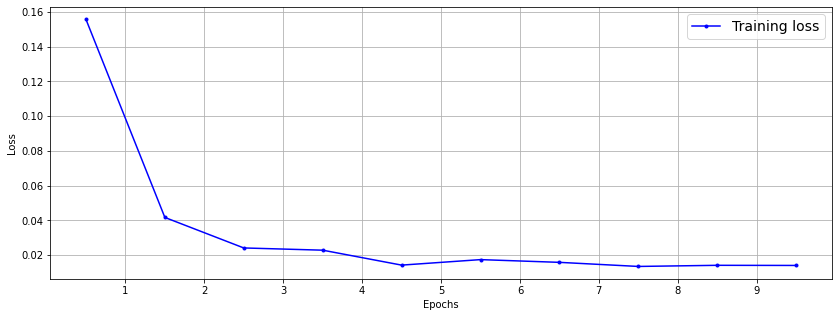

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


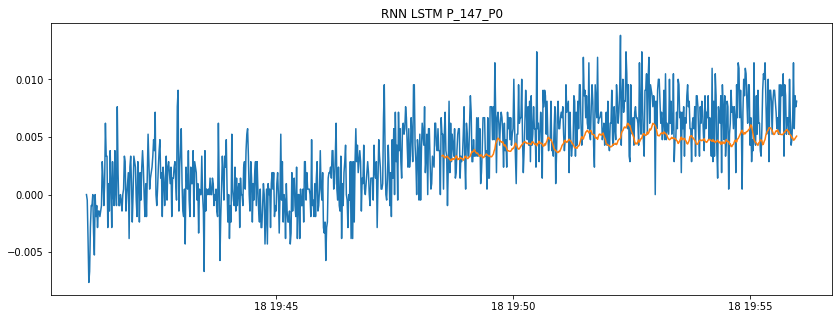

P_147_P1
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 9ms/step - loss: 0.3249
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0586
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0564
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0243
Epoch 5/10
5/5 [==============================] - 0

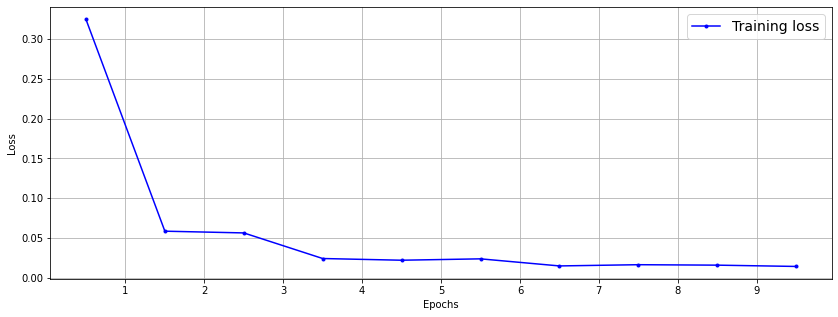

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


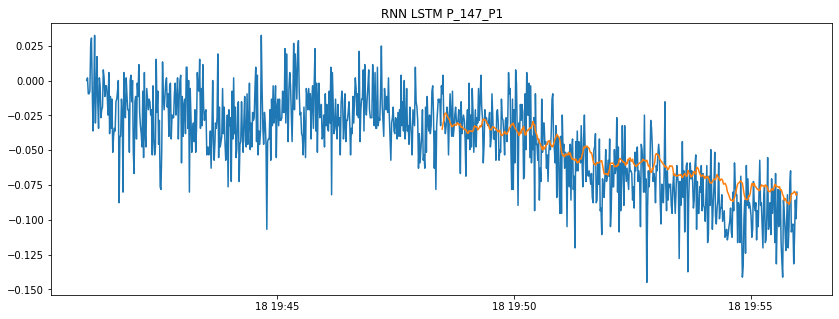

P_147_P1_L
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 8ms/step - loss: 0.4245
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0800
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0398
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0264
Epoch 5/10
5/5 [==============================] -

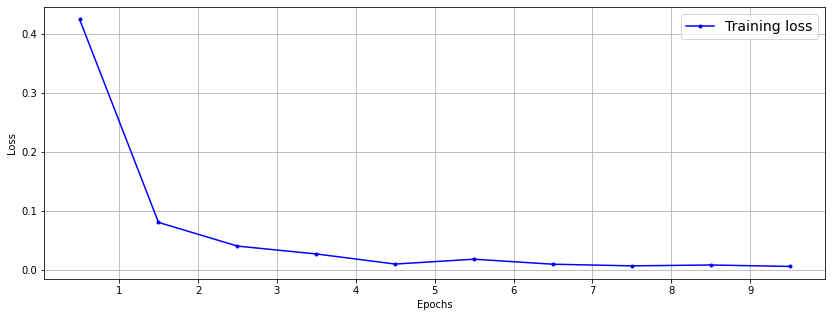

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


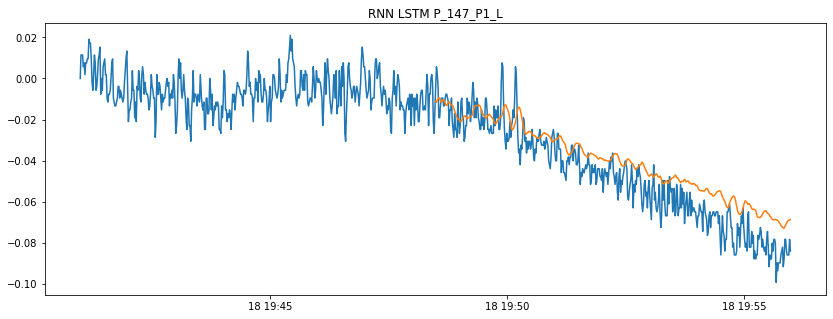

P_147_P1_W
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 9ms/step - loss: 0.3454
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 0.1131
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0227
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0399
Epoch 5/10
5/5 [==============================] -

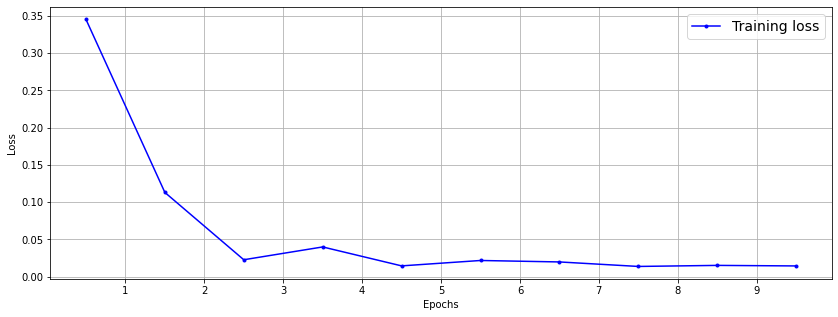

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


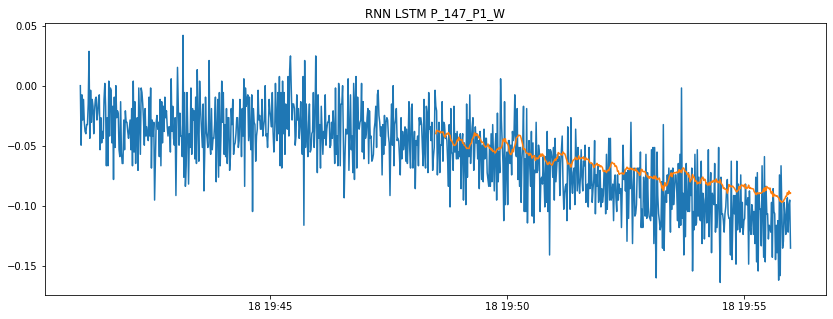

P_157_P0
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 8ms/step - loss: 0.2292
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0291
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0455
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0150
Epoch 5/10
5/5 [==============================] - 0

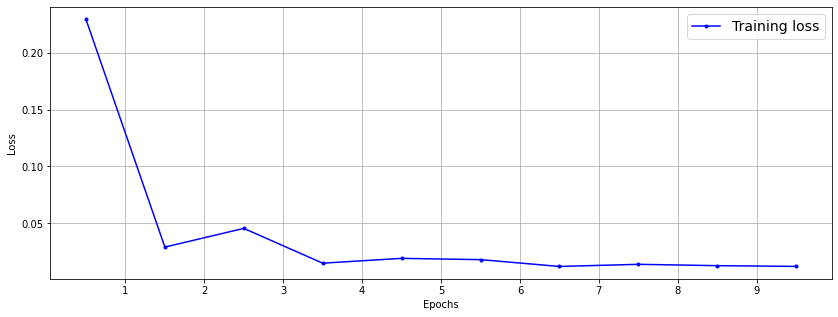

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


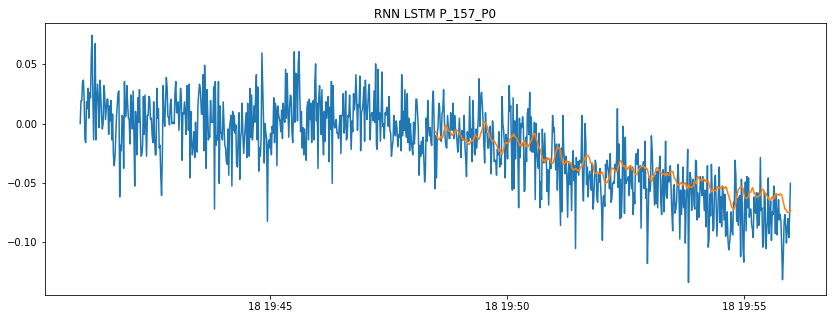

P_157_P0_L
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 8ms/step - loss: 0.3742
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1114
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0265
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0289
Epoch 5/10
5/5 [==============================] -

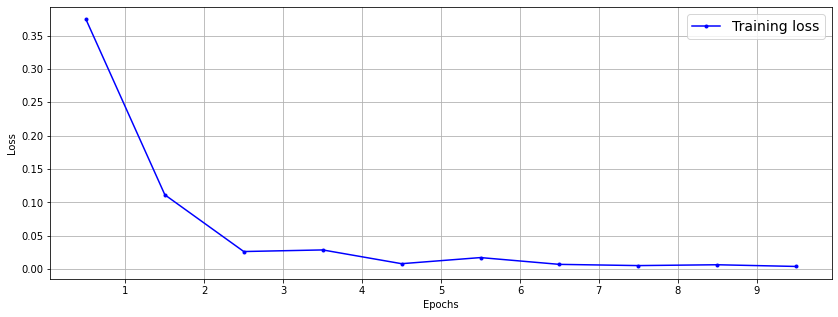

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


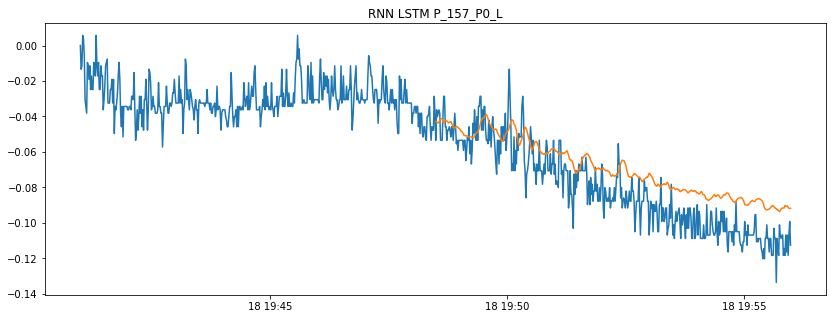

P_157_P1
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 11ms/step - loss: 0.2869
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0504
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0461
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0188
Epoch 5/10
5/5 [==============================] - 

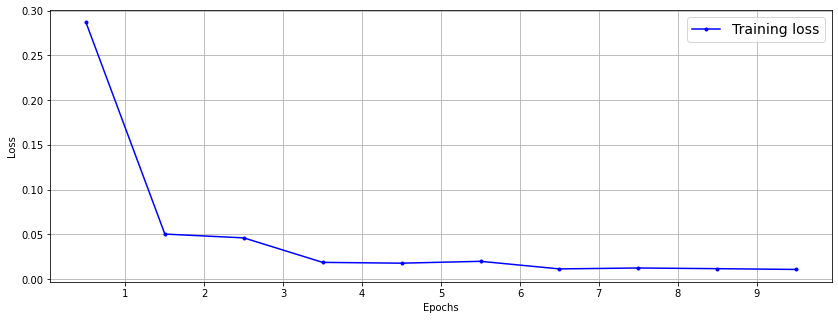

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


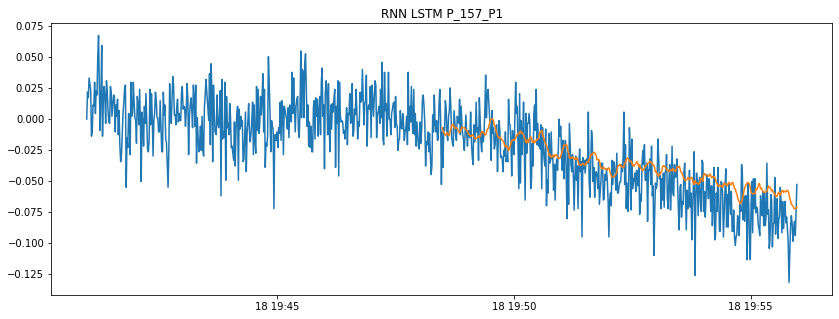

P_158_P0_FM
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 11ms/step - loss: 0.3212
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0981
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0276
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0359
Epoch 5/10
5/5 [==============================]

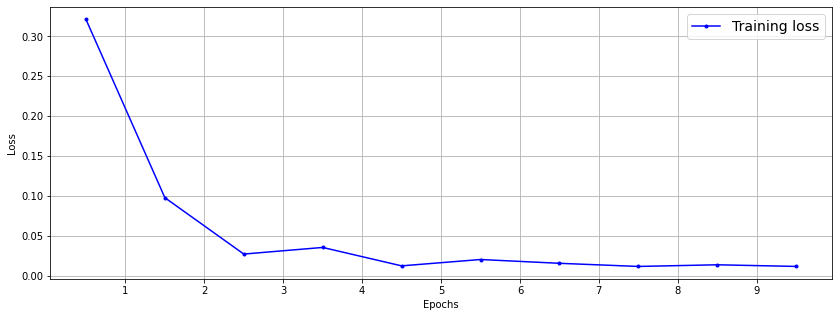

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


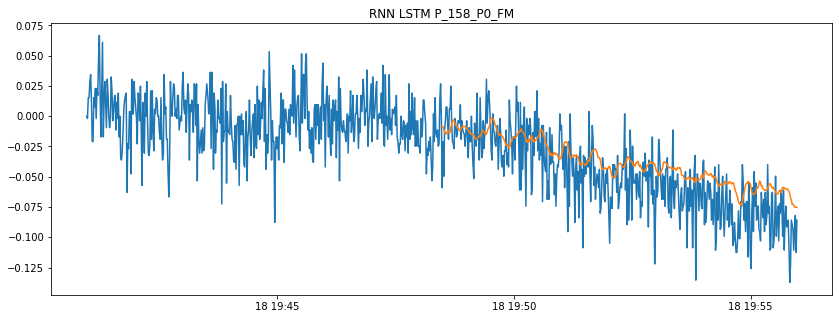

P_180_P0
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 11ms/step - loss: 0.3444
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0424
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0546
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0141
Epoch 5/10
5/5 [==============================] - 

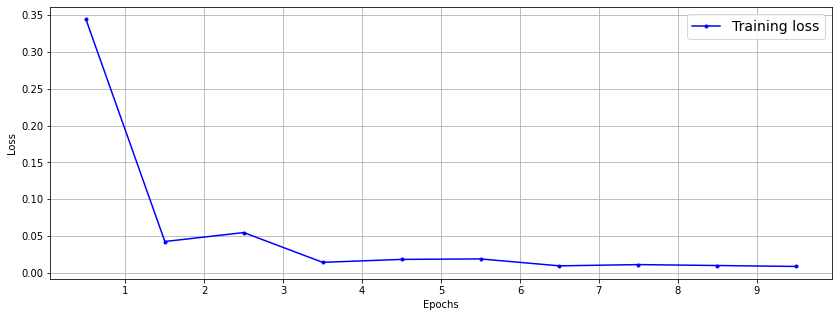

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


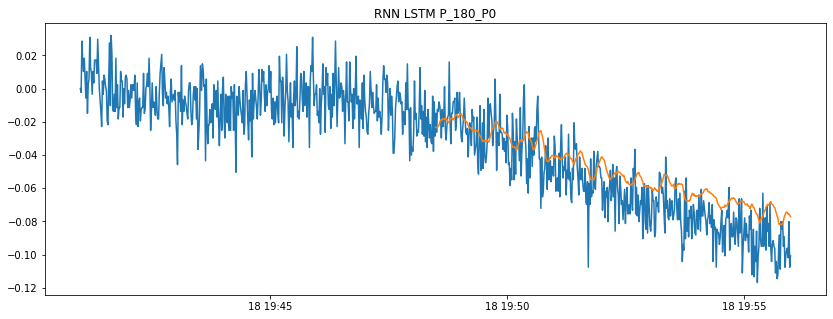

P_199_P0
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 10ms/step - loss: 0.4028
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0867
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0396
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0226
Epoch 5/10
5/5 [==============================] - 

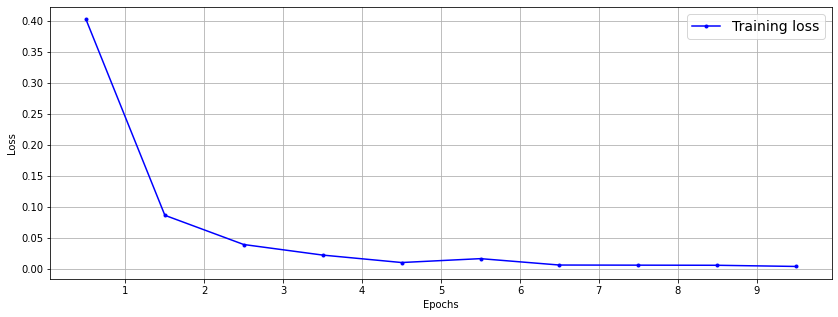

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


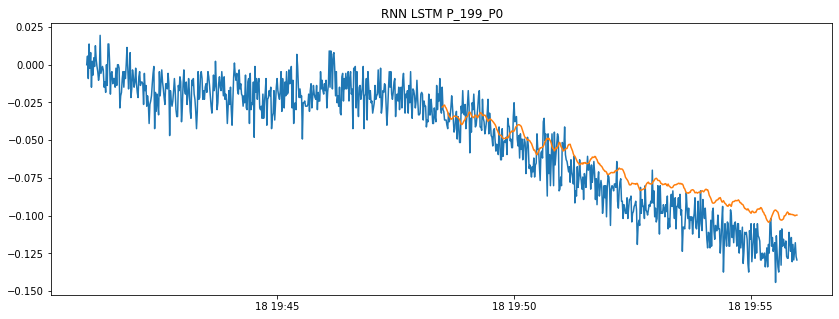

P_208_P0_FM
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 10ms/step - loss: 0.6058
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1785
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0174
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0511
Epoch 5/10
5/5 [==============================]

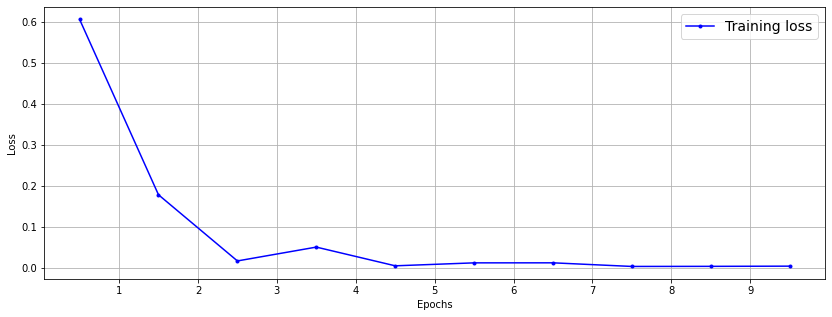

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


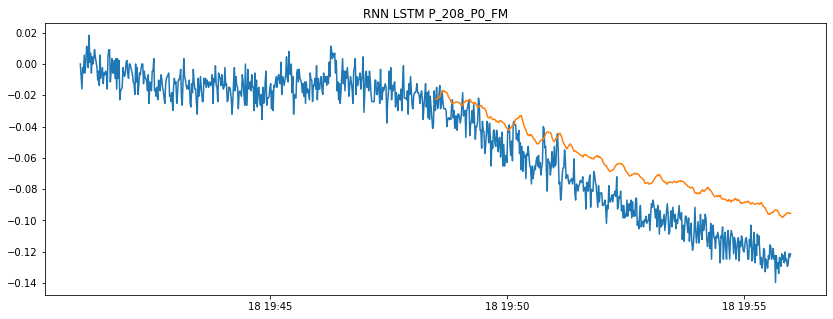

P_209_P0
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 10ms/step - loss: 0.5722
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.2053
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0200
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0561
Epoch 5/10
5/5 [==============================] - 

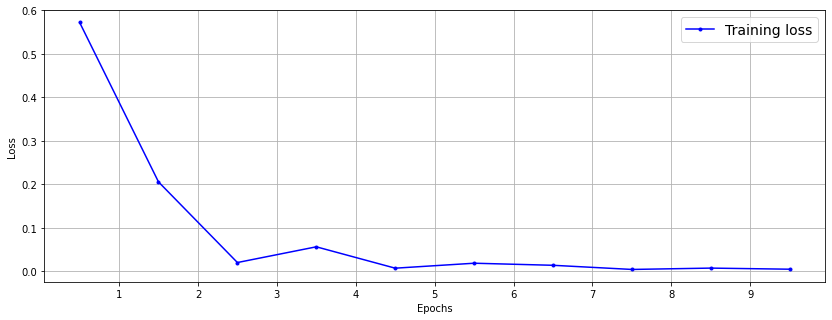

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


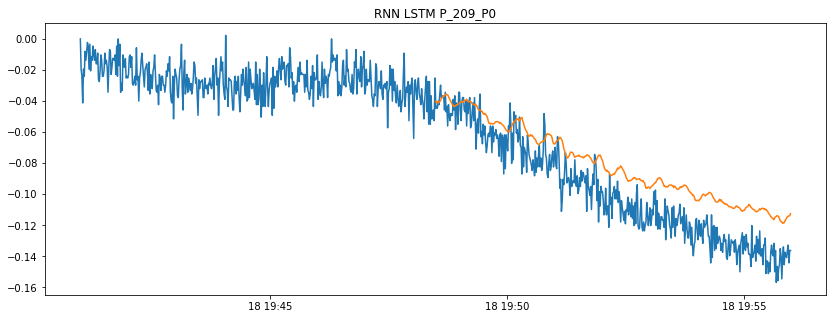

P_209_P1
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 11ms/step - loss: 0.5073
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1049
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0402
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0332
Epoch 5/10
5/5 [==============================] - 

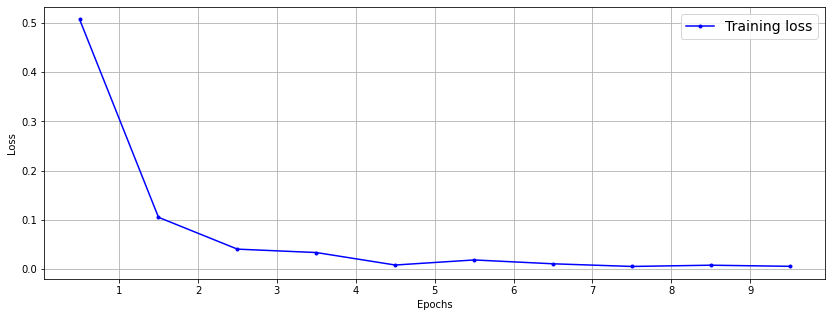

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


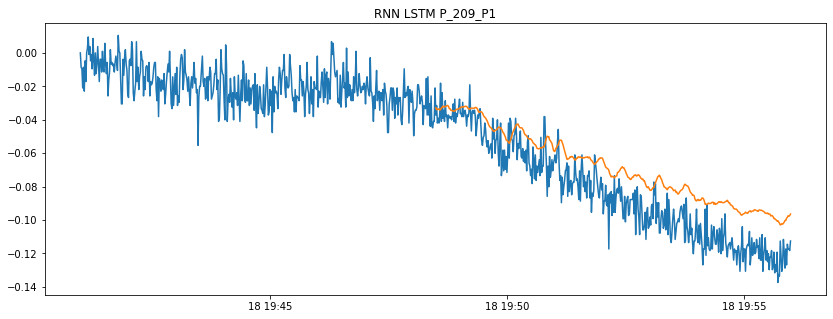

P_217_P0
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 9ms/step - loss: 0.4413
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0783
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0437
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0221
Epoch 5/10
5/5 [==============================] - 0

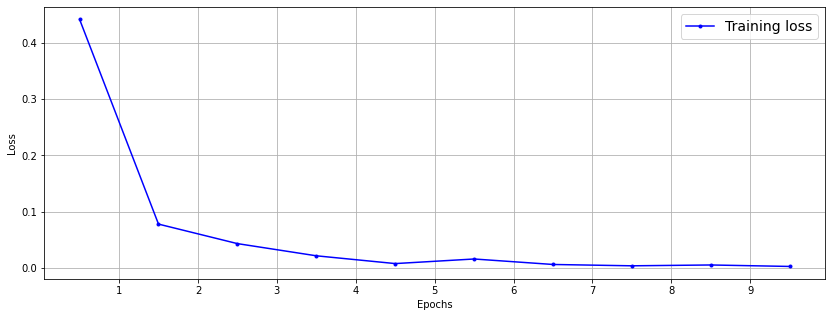

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


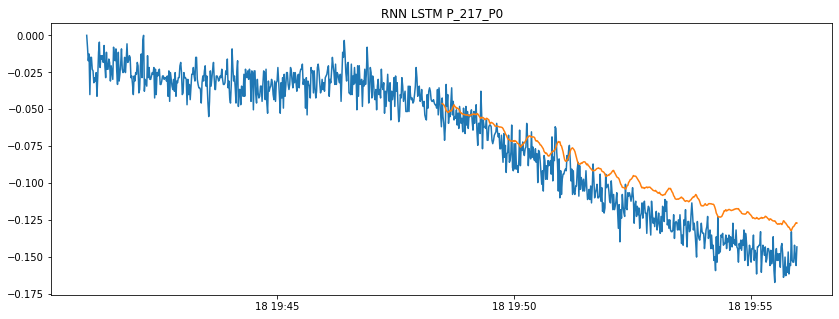

P_237_P0_FM
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 11ms/step - loss: 0.4663
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1242
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0401
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0293
Epoch 5/10
5/5 [==============================]

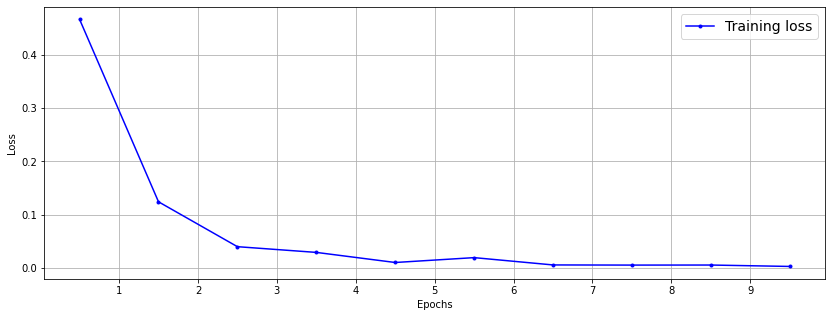

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


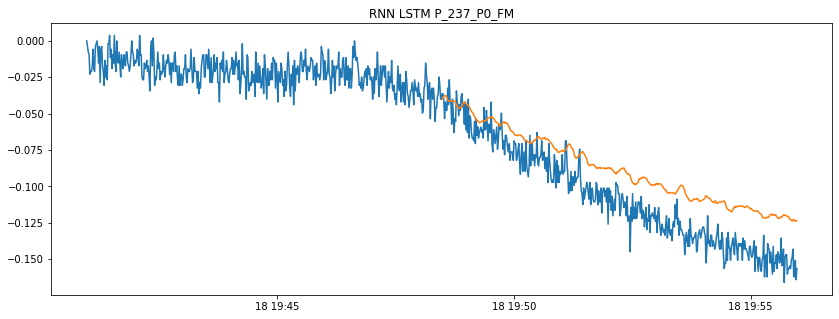

P_253_P0
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 13ms/step - loss: 0.4326
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 0.0973
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0411
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0223
Epoch 5/10
5/5 [==============================] - 

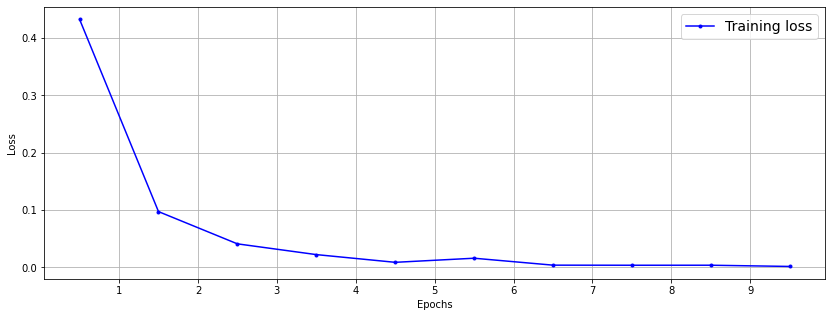

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


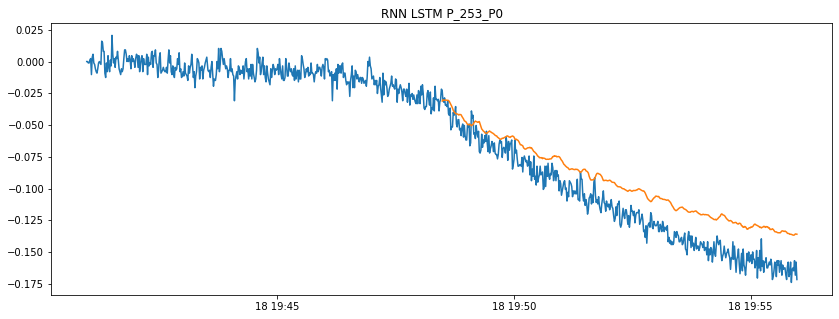

P_272_P0
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 11ms/step - loss: 0.6446
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.2141
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0242
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0556
Epoch 5/10
5/5 [==============================] - 

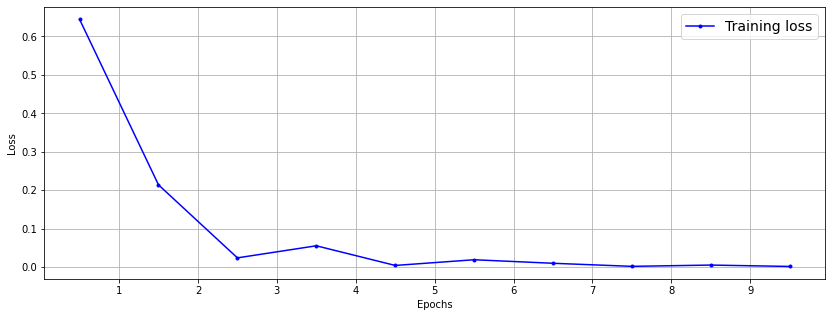

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


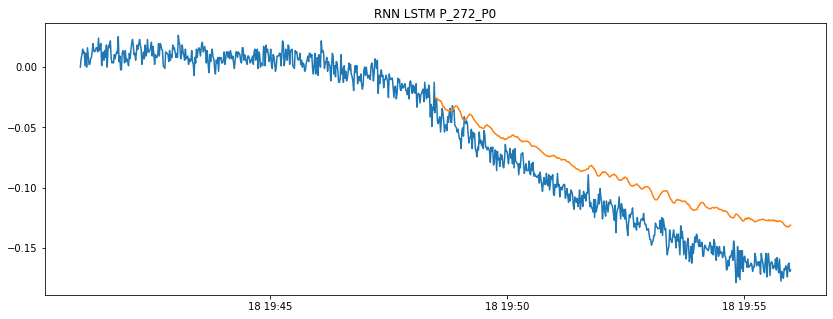

P_281_P0
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 11ms/step - loss: 0.5815
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 0.2007
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 0.0204
Epoch 4/10
5/5 [==============================] - 0s 9ms/step - loss: 0.0524
Epoch 5/10
5/5 [==============================] - 

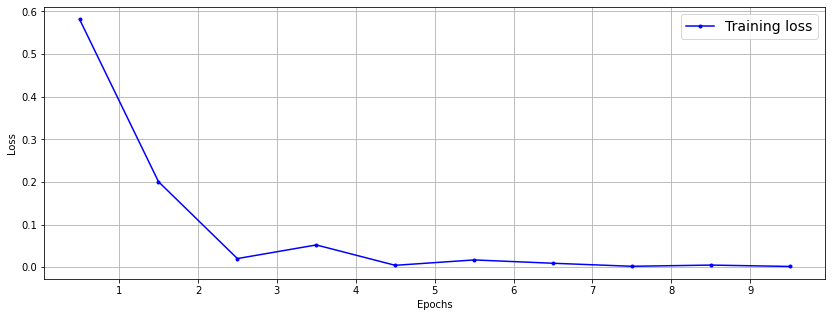

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


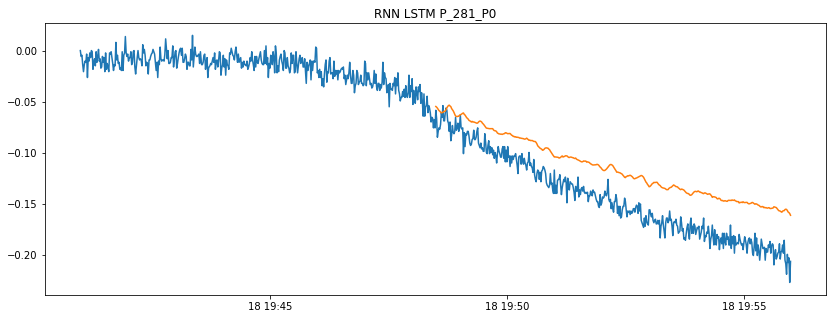

P_292_P0
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 10ms/step - loss: 0.6645
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.2111
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0246
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0567
Epoch 5/10
5/5 [==============================] - 

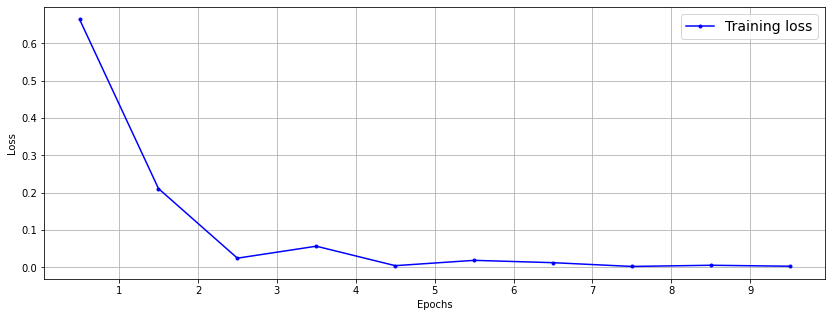

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


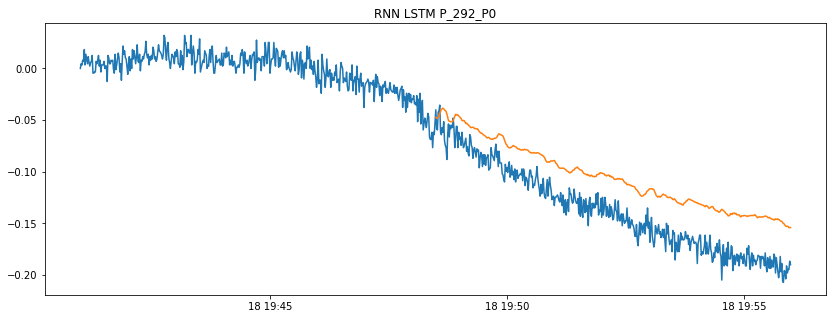

P_312_P0
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 9ms/step - loss: 0.5619
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1719
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0241
Epoch 4/10
5/5 [==============================] - 0s 9ms/step - loss: 0.0455
Epoch 5/10
5/5 [==============================] - 0

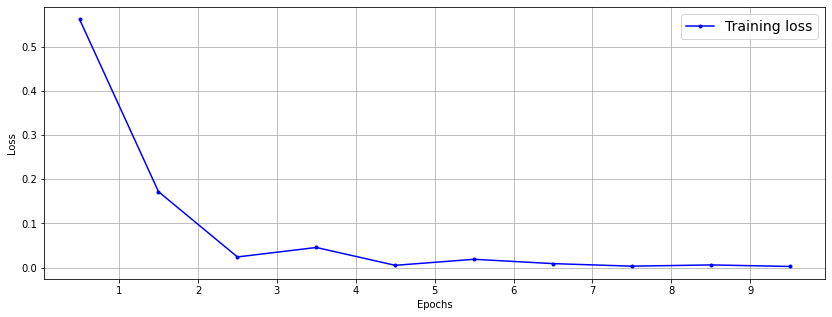

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


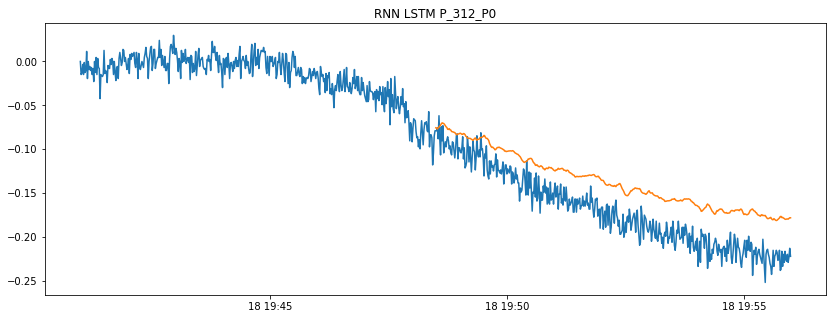

P_335_P0
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 11ms/step - loss: 0.4012
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 0.0499
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0589
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0098
Epoch 5/10
5/5 [==============================] - 

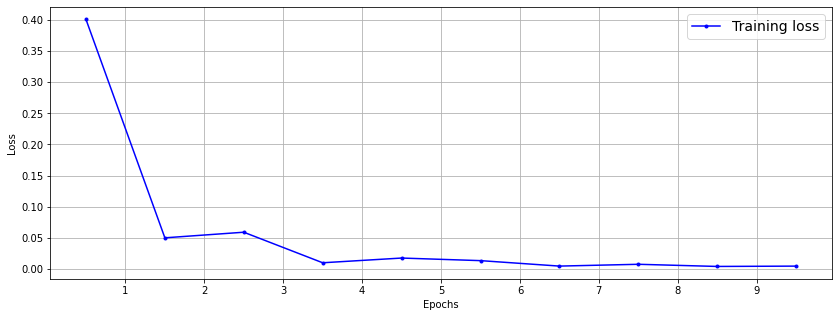

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


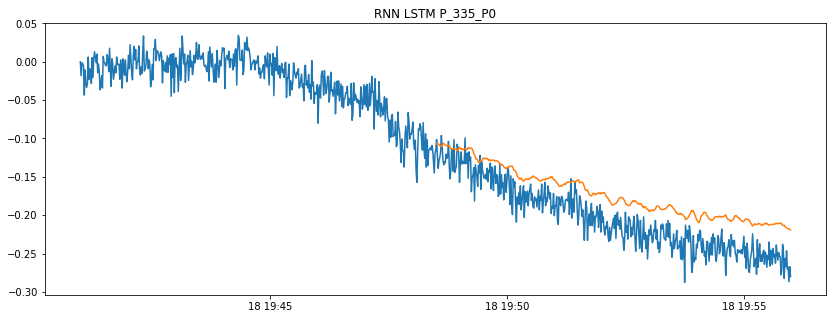

P_354_P0
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 11ms/step - loss: 0.5237
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1823
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0194
Epoch 4/10
5/5 [==============================] - 0s 10ms/step - loss: 0.0506
Epoch 5/10
5/5 [==============================] -

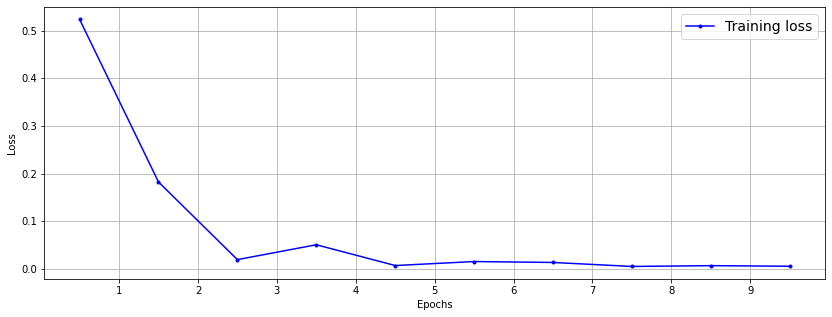

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


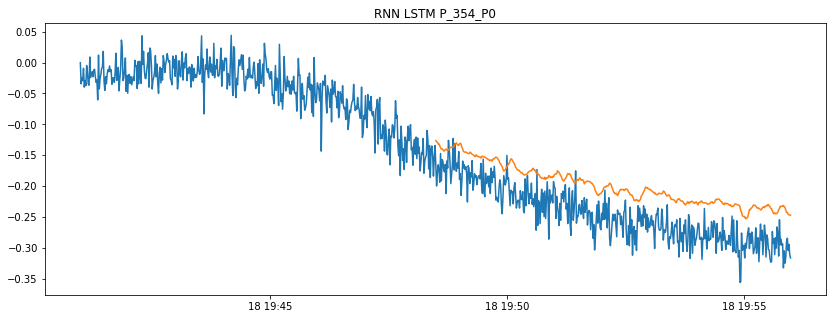

P_375_P0
(440, 10)
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 9ms/step - loss: 0.4991
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1988
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0202
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0525
Epoch 5/10
5/5 [==============================] - 0

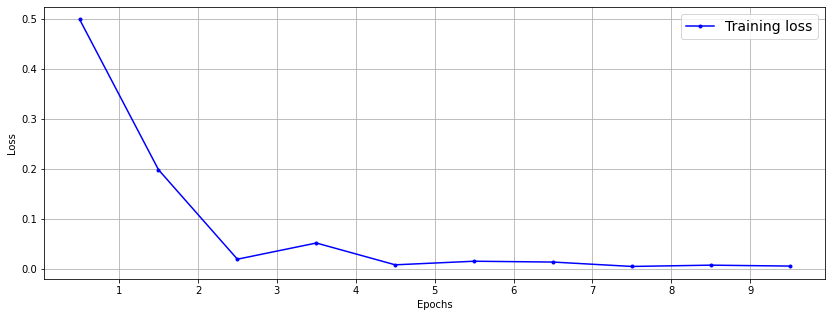

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


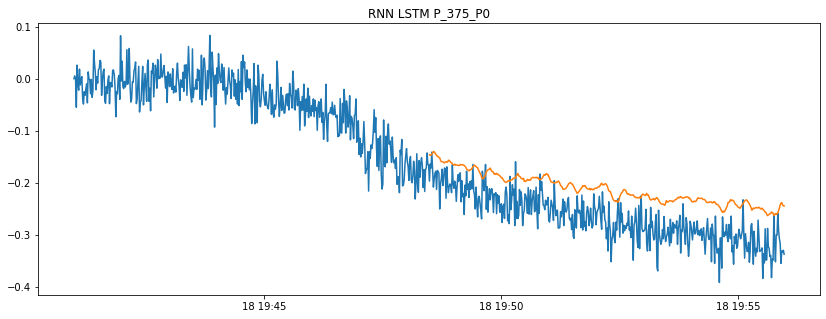

In [9]:
RNN(df)